In [395]:
from pathlib import Path

import numpy as np
import pandas as pd

# For notebook, use:
ROOT_DIR = Path.cwd().parent

In [4]:
pd.set_option("display.max_columns", 85)
pd.set_option("display.max_rows", 85)

### DATAFRAMES AND SERIES

In [5]:
# Load your CSV
df = pd.read_csv(ROOT_DIR / "data" / "stackoverflow_survey" / "2019" / "survey_results_public.csv")
schema_df = pd.read_csv(ROOT_DIR / "data" / "stackoverflow_survey" / "2019" / "survey_results_schema.csv")

In [ ]:
# head takes an int to say how many rows to display.
df.head() # first 5

In [ ]:
df.tail() # last 5

In [ ]:
# display how many rows and columns make up the data
df.shape

In [ ]:
# displays number of rows and columns in data, and additionally datatypes of the columns
df.info()

In [ ]:
# show the column names
df.columns

In [ ]:
schema_df

In [ ]:
# get column
df["Hobbyist"]

In [ ]:
# get multiple columns
df[["Hobbyist", "MainBranch"]]

In [ ]:
# get first row
df.iloc[0]

In [ ]:
# get multiple rows
df.iloc[[0,1]]

In [ ]:
# get first row but based on a lable.  By default if no lables are set they default to numeric range
df.loc[0]

In [ ]:
# get multiple rows
df.loc[[0,1]]

In [ ]:
# select row 1 and 2, but only display column 4
df.iloc[[0,1],3]

In [ ]:
# using loc now, so for colums need to use proper label for it and not an int
df.loc[[0,1], ["OpenSourcer","OpenSource"]]

In [ ]:
df["Hobbyist"]

In [ ]:
df.loc[0, "Hobbyist"]

In [ ]:
# get first 3 responses for hobbiyst column
df.loc[[0,1,2],"Hobbyist"]

In [ ]:
# slicing
# NOTE when slicing the end range is INCLUSIVE
# 0:2 means from 0 to 2 (and not to 1 as in normal ranges)
# NOTE no brackets needed around slicing
df.loc[0:2, "Hobbyist"]

In [ ]:
# slicing on the columns
df.loc[0:2, "Hobbyist":"Employment"]

In [6]:
# convert a dict to a dataframe
people = {
    "first":["Corey", "Jane", "John"],
    "last": ["Schafer", "Doe", "Doe"],
    "email": ["CoreySchafer@email.com","JaneDoe@email.com","JohnDoe@email.com"]
}

dict_df = pd.DataFrame(people)

In [ ]:
dict_df

### INDEXING

In [ ]:
# set the email column as index for this dataframe
# this only sets the index temporiraly.
# to set permanently
dict_df.set_index("email")

In [ ]:
dict_df.set_index("email").index

In [ ]:
# now that we have selected an index we can use them instead of the numerical default indexes like 0,1,2 ect when using loc
dict_df.set_index("email").loc["JaneDoe@email.com", "first"]

In [63]:
#if you set and index and mistakinly mutate the dataframe using inplace you can reset the index
dict_df.reset_index(inplace=True)

In [ ]:
df.columns

In [ ]:
# index can also be set while creating the dataframe

# to normaalize missing values that are not the normal missing values of np.na or None create a list of those custom values
# pass this list into the read_csv with argument na_values
custom_na_values=["NA", "Missing"]
indexed_df = pd.read_csv(ROOT_DIR / "data" / "stackoverflow_survey" / "2019" / "survey_results_public.csv", index_col="Respondent", na_values=custom_na_values)

indexed_schema_df = pd.read_csv(ROOT_DIR / "data" / "stackoverflow_survey" / "2019" / "survey_results_schema.csv", index_col="Column")

In [ ]:
indexed_df.head()

In [ ]:
indexed_df.loc[1]

In [ ]:
indexed_schema_df

In [ ]:
indexed_schema_df.loc["Hobbyist"]

In [ ]:
indexed_schema_df.loc["MgrIdiot", "QuestionText"]

In [ ]:
# sort the index
indexed_schema_df.sort_index(ascending=True)

### FILTERING

In [ ]:
dict_df

In [ ]:
# filter mask. 
# This creates a seris of booleans we can pass to a dataframe df OR df.loc
dict_df["last"] == "Doe"

In [29]:
filter_mask = (dict_df["last"] == "Doe")

In [ ]:
#apply filter mask to dataframe to get back rows that match the filter
dict_df[filter_mask]

In [ ]:
# can also put the filter mask directly in the dataframe call.  This looks untidy
dict_df[(dict_df["last"]=="Doe")]

In [ ]:
# Filtering by .loc is also a way to achieve the same results.
dict_df.loc[filter_mask]

In [ ]:
# using .loc allows us to additionally select out the columns we need by passing a second argument as usual to .loc
dict_df.loc[filter_mask, "email"]

In [36]:
# AND operator (&)
filter_mask_2=((dict_df["last"]=="Doe") & (dict_df["first"] == "John"))

In [ ]:
dict_df.loc[filter_mask_2, "email"]

In [43]:
# OR operator (|)
filter_mask_3 = ((dict_df["last"] == "Schafer") | (dict_df["first"] == "John"))

In [ ]:
dict_df[filter_mask_3]

In [ ]:
#NOT operator (~)
filter_mask_4 = ~((dict_df["last"] == "Schafer") | (dict_df["first"] == "John"))

In [ ]:
dict_df[filter_mask_4]

In [ ]:
# Do negation in dataframe call as an alternative
filter_mask_5 = ((dict_df["last"] == "Schafer") | (dict_df["first"] == "John"))
dict_df[~filter_mask_5]

In [54]:
high_salary = (indexed_df["ConvertedComp"] > 70000)

In [ ]:
indexed_df.loc[high_salary, ["Country", "LanguageWorkedWith","ConvertedComp"]]

In [59]:
# We now want to filter down this list to a few selected countries
countries = ["United States", "India", "United Kingdom", "Germany", "Canada"]
filter_mask_6 = indexed_df["Country"].isin(countries)

In [ ]:
indexed_df.loc[filter_mask_6, "Country"]

In [71]:
filter_mask_7 = indexed_df["LanguageWorkedWith"].str.contains("Python", na=False)

In [ ]:
indexed_df.loc[filter_mask_7,"LanguageWorkedWith"]

### UPDATING ROWS AND COLUMNS

In [ ]:
# rename column headings
dict_df.columns=["first_name", "last_name", "email"]
dict_df.columns

In [ ]:
dict_df

In [ ]:
# change all column names to uppercase using a list comprehension
dict_df.columns = [x.lower() for x in dict_df.columns]

dict_df

In [ ]:
# replace spaces with underscores in column name
dict_df.columns = [x.replace(" ", "_") for x in dict_df.columns]
# OR
dict_df.columns = dict_df.columns.str.replace(" ", "_")
dict_df

In [ ]:
# change only some columns not all, using the rename method.
# it takes a column parameter which is just a dict of the columns we want to affect
# note this creates a new dataframe and the change made is not in place. So need to resave it to a variable
dict_df = dict_df.rename(columns={"first_name":"first", "last_name":"last"})
dict_df

In [ ]:
# changing values in the dataframe for entire row
# select row
# pass in all new values you want to change in that row
dict_df.loc[2] = ["John", "Smith", "JohnSmith@email.com"]
dict_df


In [ ]:
# changing values in the dataframe for specific columns in a row
# select row
# pass in all new values you want to change in that row
dict_df.loc[2, ["last", "email"]] = ["Doe", "JohnDoe@email.com"]
dict_df


In [ ]:
# change a single value
# select row and col  and change the value in it
dict_df.loc[2, "last"] = "Smith"
dict_df

In [ ]:
# ALWAYS use .loc when setting values or you can run into errors
filter_mask_8 = (dict_df["email"]=="JohnDoe@email.com")

# .loc is use to apply the filter to the rows and the second arg selects the desired column
dict_df.loc[filter_mask_8,"last"] = "Smith"

dict_df

In [ ]:
# convert all emails to lowercase
dict_df["email"] = dict_df["email"].str.lower()
dict_df

In [ ]:
# 4 other methods to do updates
# apply
# map
# replace

In [ ]:
# apply
# works on a dataframe or series
# behaviour is different depending on if it operates on a dataframe or a series

In [ ]:
# apply on a series
# apply a function to every value in our series

# applies the len function to all values in our series
dict_df["email"].apply(len)

In [ ]:
def update_email(email:str)->str:
    return email.upper()

dict_df["email"] = dict_df["email"].apply(update_email)

dict_df

In [ ]:
# use a lambda function is also possible
dict_df["email"] = dict_df["email"].apply(lambda x: x.lower())

dict_df

In [ ]:
# apply on a dataframe
# apply a function to every series of the data frame
# therefore only use functions that can be used properly with series

# applies the len function to the series in the dataframe
# eg each series in dict_df is 3 units long
# i.e the series contains 3 values
dict_df.apply(len)

In [ ]:
# Grab the minimum value from each column
dict_df.apply(pd.Series.min)

In [ ]:
# using a lamda
dict_df.apply(lambda x: x.min())

In [ ]:
# map (dataframe)
# it wokrs on dataframes and series
# it will run the function on every value in the dataframe

dict_df.map(len)

In [ ]:
# map
dict_df.map(str.lower)

In [ ]:
# map (series)
dict_df["first"].map(len)

In [ ]:
# be careful if a value in the series is not in your map then it will be converted to a NaN
# use replace instead!!!!
dict_df["first"].map({"Corey": "Chris", "Jane":"Mary"})

In [ ]:
dict_df["first"].replace({"Corey": "Chris", "Jane":"Mary"})

In [349]:
# praticing what we learned in Stackoverflow data

indexed_df= indexed_df.rename(columns={"ConvertedComp":"SalaryUSD"})

In [ ]:
indexed_df["SalaryUSD"]

In [ ]:
indexed_df["Hobbyist"]

In [ ]:
indexed_df["Hobbyist"].map({"Yes":True, "No":False})

### ADDING AND REMOVING ROWS AND COLUMNS

In [ ]:
dict_df

In [ ]:
dict_df["first"] + " " + dict_df["last"]

In [ ]:
# create a new column "full_name" from two existing columns
# by combining two existing columns to get a series and assinging that as a new column to the dataframe
dict_df["full_name"] = dict_df["first"] + " " + dict_df["last"]

dict_df

In [172]:
# remove column
dict_df= dict_df.drop(columns=["first", "last"])

In [ ]:
dict_df

In [ ]:
# split would create a series where each value is a list eg ["Tom", Hanks]
# to brek that into columns per items in list, use the "expand" flag
dict_df["full_name"].str.split(" ", expand=True)

,0,1
0,Corey,Schafer
1,Jane,Doe
2,John,Smith


In [176]:
dict_df[["first", "last"]] = dict_df["full_name"].str.split(" ", expand=True)

In [ ]:
dict_df

In [183]:
# add a single row
new_row = pd.DataFrame({"first": ["Tony"]})
dict_df=pd.concat([dict_df, new_row], ignore_index=True)


In [ ]:
dict_df

In [185]:
# add multiple rows

people_2 = {
    "first":["Tony", "Steve"],
    "last": ["Stark", "Rogers"],
    "email": ["Ironman@avengers.com","Cap@avengers.com"],
}

new_rows = pd.DataFrame(people_2)
dict_df = pd.concat([dict_df, new_rows], ignore_index=True)

In [ ]:
dict_df

In [ ]:
# remove a row
dict_df.drop(index=3)

In [ ]:
dict_df

In [ ]:
# remove multiple rows based on a filter
filt = dict_df["last"]=="Doe"
dict_df.drop(index=dict_df[filt].index)

### SORTING DATA

In [201]:
dict_df.loc[2,"last"] = "Doe"

In [ ]:
dict_df.sort_values(by="last")

In [ ]:
# sort descinding
dict_df.sort_values(by="last", ascending=False)

In [ ]:
# sort by multiple columns
dict_df.sort_values(by=["last", "first"])

In [ ]:
# tell each column how to be sorted by passing a list of matching true, false values to the ascending pararmeter
dict_df.sort_values(by=["last", "first"], ascending=[False, True])

In [ ]:
# sort by index
dict_df.sort_index()

In [ ]:
# sort and display only the sorted column
dict_df["last"].sort_values()

In [213]:
# testing with the StackOverflow survey data
indexed_df = indexed_df.sort_values(by=["Country", "SalaryUSD"], ascending=[True, False])

In [ ]:
indexed_df[["Country", "SalaryUSD"]].head(50)

In [ ]:
# view 10 highest salaries
indexed_df["SalaryUSD"].nlargest(10)

In [ ]:
# View ten largest salaries but with additional data
indexed_df.nlargest(10, "SalaryUSD")

In [ ]:
indexed_df.nsmallest(10, "SalaryUSD")

### Grouping AND AGGREGATING

In [ ]:
# get median salary
indexed_df["SalaryUSD"].median()

In [ ]:
# give a broad overview (stats) of our dataframe
indexed_df.describe()

In [ ]:
indexed_df["SalaryUSD"].describe()

In [ ]:
# counts non-missing rows
indexed_df["SalaryUSD"].count()

In [ ]:
# get a count of each distinct value in the series
indexed_df["Hobbyist"].value_counts()

In [ ]:
# get breakdown of social media platforms used
indexed_df["SocialMedia"].value_counts()

In [ ]:
# get breakdown of social media platforms used by percentile
indexed_df["SocialMedia"].value_counts(normalize=True)

In [ ]:
# Grouping consist of:
# 1. Split the object
# 2. Apply a function
# 3. Combine the results

In [238]:
# produces a DataFrameGroupBy object
# it is an object that contains a bunch of groups
country_groups=indexed_df.groupby(["Country"])

In [ ]:
# a tuple or a list is passed to get_group
# NOTE if the tuple conatains just one value much end it with a trailing comma to ensure its a tuple
country_groups.get_group(("India",))

In [ ]:
# Group by country (SPLIT)
country_groups = indexed_df.groupby(["Country"])


In [ ]:
# Get counts of social media platforms per country (APPLY FUNCTION)
country_groups["SocialMedia"].value_counts().head(50)

In [ ]:
# Get counts of social media platforms for India
country_groups["SocialMedia"].value_counts().loc["Russian Federation"]

# NOTE you can get same result BUT ONLY for one country using filter
# filt = indexed_df["Country"] == "India"
# indexed_df.loc[filt]["SocialMedia"].value_counts()



In [ ]:
#Median salary by country
country_groups["SalaryUSD"].median().loc["Germany"]

In [ ]:
# Run multiple functions on your gruop using AGG
country_groups["SalaryUSD"].agg(["median", "mean"])

In [ ]:
# Run multiple functions on your gruop using AGG, drill down to a specific country
country_groups["SalaryUSD"].agg(["median", "mean"]).loc["Canada"]

In [ ]:
# How many people in each country use python. USE FILTER
filt = indexed_df["Country"] == "India"

# sum takes the series of true, flase and treats True as 1 and false as 0. So it can indeed sum up a boolean column
indexed_df.loc[filt]["LanguageWorkedWith"].str.contains("Python").sum()

In [ ]:
# How many people in each country use python. USE AGGREGATION
# we apply a function to each series in this group. NOTE the function RuNS on the series
# as usual each series is made up of the data for a country
country_groups["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python").sum())

In [ ]:
# Now instead of display numbers per country display percentages which is more useful

# 1. Get the # of respondants per country
respondants_by_country = indexed_df["Country"].value_counts()

# 2. Get the # of respondants per country that use python
respondants_by_country_python =country_groups["LanguageWorkedWith"].apply(lambda x: x.str.contains("Python").sum())


# merge the two series columnwise using pd.concat
respondants_by_country_python_percent = pd.concat([respondants_by_country, respondants_by_country_python], axis="columns")

# give colums proper names
respondants_by_country_python_percent= respondants_by_country_python_percent.rename(columns={"count": "NumRespondants", "LanguageWorkedWith":"NumKnowsPython"})

# Create a new column that will now hold percentages
respondants_by_country_python_percent["PctKnowsPython"] = (respondants_by_country_python_percent["NumKnowsPython"] / respondants_by_country_python_percent["NumRespondants"]) * 100

respondants_by_country_python_percent

In [ ]:
respondants_by_country_python_percent=respondants_by_country_python_percent.sort_values(["PctKnowsPython"], ascending=False)
respondants_by_country_python_percent.head(50)

In [ ]:
respondants_by_country_python_percent.loc["Japan"]

### CLEANING DATA

In [ ]:
cleaning_dict = {
    "first": ["Corey", "Jane", "John", "Chris", np.nan, None, "NA"],
    "last": ["Schafer", "Doe", "Doe", "Schafer", np.nan, np.nan, "Missing"],
    "email": ["CoreyMSchafer@gmail.com", "JaneDoe@email.com", "JohnDoe@email.com", None, np.nan, "Anonymous@email.com", "NA"],
    "age": ["33", "55", "63", "36", None, None, "Missing"],
}

cleaning_df = pd.DataFrame(cleaning_dict)

# Replace missing data marked with custom representation with real missing data
# for example the creator of the data may use "NA" or "Missing" to represent missing data
# we just need to replace those in entire dataframe with real repesentation of missing data
cleaning_df= cleaning_df.replace("NA", np.nan)
cleaning_df= cleaning_df.replace("Missing", np.nan)

# NOTE for csv files we handle custom representations of missing data differently!!!
# See cell far above where we import to indexed_df

cleaning_df


In [ ]:
# drop rows with missing data
cleaning_df.dropna()

In [ ]:
# defaults with which dropna runs
# axis (index, columns)
#  - index: drop na values when our rows are missing values
#  - columns: drop na values when our columns are missing values
#
# how (any, all) - criteria for dropping
#  - any: drop when some values are missing
#  - all: drop when all values are missing

# dropping rows, since axis is index, where some values are missing across the row
cleaning_df.dropna(axis="index", how="any")

In [ ]:
# dropping rows, since axis is index, where all values are missing across the row
cleaning_df.dropna(axis="index", how="all")

In [ ]:
# dropping columns, since axis is columns, where all values are missing in the column
cleaning_df.dropna(axis="columns", how="all")

In [ ]:
# We can drop rows that have missing values in specific columns by passing a "subset" argument to dropna
cleaning_df.dropna(axis="index", how="any", subset=["email"])

In [ ]:
# drop rows if both last and email are missing
cleaning_df.dropna(axis="index", how="all", subset=["last", "email"])

In [ ]:
# see which values in our df are identified as missing data
# missing data will have true 
cleaning_df.isna()

In [ ]:
# replace missing data with a default value.
# example when working with numeric data may want to fill missing data with zeros eg. cleaning_df.fillna(0)

# here we do not have numerical data so we will fill missing data with the string 'MISSING'
cleaning_df.fillna("MISSING")

In [ ]:
# the age field looks like they are numeric but they are actually strings
cleaning_df

In [ ]:
# check the data types of each column
cleaning_df.dtypes

# as you can see the age datatype is not a numeric so doing numerical operations on it will fail
# we will need to convert this column to a numeric datatype
# now if this column contains missing data, will need to convert to FLOAT (not int)

In [ ]:
# lets convert or cast this column to a float datatype
# remember to use float not int as if missing data is present usually represented by np.nan, that is a float under the hood
# and it would be an issue trying to cast those as an int
cleaning_df["age"] = cleaning_df["age"].astype(float)
cleaning_df.dtypes

In [ ]:
# Now we can calulate the mean aga
cleaning_df["age"].mean()

In [ ]:
# calculate the average number of years coding among participants of the Stack Overflow survey

indexed_df["YearsCode"].head(10)

# Note that the dtype is object, so need to convert it to float

In [ ]:
# convert column to float
indexed_df["YearsCode"]=indexed_df["YearsCode"].astype(float)

# this will still give an error though as some of the values in this coulumn are actual strings
# example one such value is "Less than 1 year". Whoaaa!

In [ ]:
# So lets look at the unique values of this column to see what we are dealing with
indexed_df["YearsCode"].unique()

In [ ]:
# We see we have two problematic strings
# "More than 50 years" --> we will replace this with 51. meh!
# "Less than 1 year"  --> we will replace this with 0

indexed_df["YearsCode"] = indexed_df["YearsCode"].replace("Less than 1 year", 0)
indexed_df["YearsCode"] = indexed_df["YearsCode"].replace("More than 50 years", 51)

indexed_df["YearsCode"].unique()

In [ ]:
# NOW we can try conversion of this column to float again
indexed_df["YearsCode"]=indexed_df["YearsCode"].astype(float)

# Now we can get the mean/average
indexed_df["YearsCode"].mean()


In [ ]:
indexed_df["YearsCode"].median()

### DATE AND TIME SERIES DATA

#### Resources
- [Datetime Formatting Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior)
- [Pandas Date Offset Codes](ttps://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [426]:
datetime_df =  pd.read_csv(ROOT_DIR / "data" / "ETH_1h.csv")

# Alternative to convert date/time columns on load
datetime_df =  pd.read_csv(ROOT_DIR / "data" / "ETH_1h.csv", parse_dates=["Date"], date_format="%Y-%m-%d %I-%p" )

In [ ]:
datetime_df.head()


In [364]:
# If the column does not follow a standardize date format, we must past it a format string to help it out, otherwise will get error
datetime_df["Date"] = pd.to_datetime(datetime_df["Date"], format="%Y-%m-%d %I-%p")

In [389]:
datetime_df.loc[0,"Date"].day_name()

'Friday'

In [ ]:
# run functions on entire series by using ".dt"
datetime_df["Date"].dt.day_name()

In [392]:
# create a day name column
datetime_df["DayOfWeek"] = datetime_df["Date"].dt.day_name()

In [ ]:
# Get earliest date
datetime_df["Date"].min()

In [ ]:
# can subtract dates to get time between dates. This is called a time delta

# find the time between the earliest and latest date

datetime_df["Date"].max() - datetime_df["Date"].min()

In [ ]:
# filter by date

filt = (datetime_df["Date"] >= "2019") & (datetime_df["Date"] < "2020")
datetime_df.loc[filt]

In [ ]:
# filter by date

filt = (datetime_df["Date"] >= pd.to_datetime("2019-01-01")) & (datetime_df["Date"] < pd.to_datetime("2020-01-01"))
datetime_df.loc[filt]

In [427]:
# slicing using dates
# must set index to the Date column as each of its values are actually unique.  Then we can slice

datetime_df= datetime_df.set_index("Date").sort_index()

datetime_df

,Symbol,Open,High,Low,Close,Volume
Date,,,,,,
2017-07-01 11:00:00,ETHUSD,279.98,279.99,272.10,275.01,679358.87
2017-07-01 12:00:00,ETHUSD,275.01,275.01,271.00,274.83,824362.87
2017-07-01 13:00:00,ETHUSD,274.83,274.93,265.00,268.79,3010787.99
2017-07-01 14:00:00,ETHUSD,268.79,269.90,265.00,265.74,1702536.85
2017-07-01 15:00:00,ETHUSD,265.74,272.74,265.00,272.57,1500282.55
...,...,...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71
2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81


In [ ]:
# Now we can slice
datetime_df.loc["2017"]

In [ ]:
# datetime_df.loc["2020-01":"2020-02"]
datetime_df.loc["2020-01":"2020-02"]

In [432]:
# Getting the avg Close amt for a date range
datetime_df.loc["2020-01":"2020-02"]["Close"].mean()

np.float64(195.1655902777778)

In [434]:
datetime_df.loc["2020-01-01"]["High"].max()

np.float64(132.68)

In [ ]:
# Get high value by day using resample, because the data is high per hour per day
# currently it is sampled per hour
# we can resample per day by passing "D" to "resample" or "2D" for every 2 days,  "W" for week.
# Now tell it what function you want to apply to the resampling
daily_highs= datetime_df["High"].resample("D").max()

daily_highs

In [439]:
daily_highs.loc["2020-01-01"]

np.float64(132.68)

In [440]:
%matplotlib inline

<Axes: xlabel='Date'>

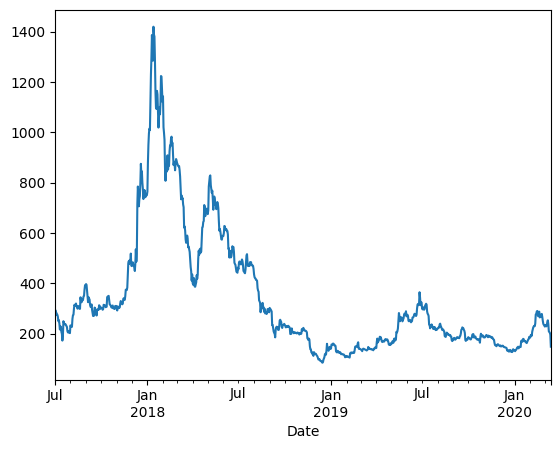

In [441]:
daily_highs.plot()

In [444]:
# Resampling multipe columns
datetime_df.resample("W").agg({"High":"max", "Low":"min", "Close": "mean", "Volume":"sum"})


,High,Low,Close,Volume
Date,,,,
2017-07-02,293.73,253.23,268.202162,8.084631e+07
2017-07-09,285.00,231.25,261.062083,2.246746e+08
2017-07-16,240.33,130.26,195.698393,5.017750e+08
2017-07-23,249.40,153.25,212.783750,7.221637e+08
2017-07-30,229.99,178.03,203.309524,2.657305e+08
...,...,...,...,...
2020-02-16,290.00,216.31,255.198452,3.912867e+08
2020-02-23,287.13,242.36,265.321905,3.067838e+08
2020-03-01,278.13,209.26,236.373988,3.693920e+08
